In [1]:
from sqlalchemy import create_engine, inspect
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base

from sqlalchemy import Column, Integer, String, Float

import matplotlib.pyplot as plt

import pandas as pd

engine = create_engine('postgresql://localhost:5432/employee_db')
connection = engine.connect()


In [2]:
inspector = inspect(engine)

In [3]:
inspector.get_table_names()

['departments', 'dept_emp', 'dept_manager', 'employees', 'salaries', 'titles']

In [4]:
columns_salaries = inspector.get_columns('salaries')
for column in columns_salaries:
    print(column["name"], column["type"])
    

emp_no INTEGER
salary INTEGER
from_date DATE
to_date DATE


In [5]:
columns_titles = inspector.get_columns('titles')
for column in columns_titles:
    print(column["name"], column["type"])
    

emp_no INTEGER
title VARCHAR
from_date DATE
to_date DATE


In [6]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [7]:
Salaries = Base.classes.salaries
Titles = Base.classes.titles

In [8]:
session = Session(engine)

In [23]:
sel = [Salaries.emp_no, Salaries.salary, Salaries.from_date, Salaries.to_date, Titles.title, Titles.from_date, Titles.to_date]
merge = session.query(*sel).filter(Salaries.emp_no == Titles.emp_no and Salaries.from_date == Titles.from_date).all()

merge



[(10005,
  78228,
  datetime.date(1989, 9, 12),
  datetime.date(1990, 9, 12),
  'Senior Staff',
  datetime.date(1996, 9, 12),
  datetime.date(9999, 1, 1)),
 (10005,
  78228,
  datetime.date(1989, 9, 12),
  datetime.date(1990, 9, 12),
  'Staff',
  datetime.date(1989, 9, 12),
  datetime.date(1996, 9, 12)),
 (10010,
  72488,
  datetime.date(1996, 11, 24),
  datetime.date(1997, 11, 24),
  'Engineer',
  datetime.date(1996, 11, 24),
  datetime.date(9999, 1, 1)),
 (10011,
  42365,
  datetime.date(1990, 1, 22),
  datetime.date(1991, 1, 22),
  'Staff',
  datetime.date(1990, 1, 22),
  datetime.date(1996, 11, 9)),
 (10018,
  55881,
  datetime.date(1987, 4, 3),
  datetime.date(1988, 4, 2),
  'Engineer',
  datetime.date(1987, 4, 3),
  datetime.date(1995, 4, 3)),
 (10018,
  55881,
  datetime.date(1987, 4, 3),
  datetime.date(1988, 4, 2),
  'Senior Engineer',
  datetime.date(1995, 4, 3),
  datetime.date(9999, 1, 1)),
 (10035,
  41538,
  datetime.date(1988, 9, 5),
  datetime.date(1989, 9, 5),
  'Engin

In [9]:
salaries_query = session.query(Salaries.emp_no, Salaries.salary, Salaries.from_date, Salaries.to_date).order_by(Salaries.salary).all()

titles_query = session.query(Titles.emp_no, Titles.title, Titles.from_date, Titles.to_date).order_by(Titles.emp_no).all()




In [24]:
salaries_df = pd.DataFrame(salaries_query, columns=['emp_no', 'salary', 'from_date', 'to_date'])
titles_df = pd.DataFrame(titles_query, columns=['emp_no', 'title', 'from_date', 'to_date'])

merge_df = pd.DataFrame(merge, columns=['emp_no', 'salary', 'salary_from_date', 'salary_to_date', 'title', 'title_from_date', 'title_to_date'])


In [25]:
salaries_df

emp_no  salary   from_date     to_date
0        42589   40000  1989-03-07  1990-03-07
1        68253   40000  1993-01-23  1994-01-23
2        44127   40000  1996-10-22  1997-10-22
3        26876   40000  1997-02-04  1998-02-04
4        44124   40000  1998-05-26  1999-05-26
...        ...     ...         ...         ...
300019   37558  125469  1989-02-23  1990-02-23
300020  458302  126703  1998-10-05  1999-10-05
300021  444756  127041  1999-06-14  2000-06-13
300022   44188  127238  1991-03-16  1992-03-15
300023  205000  129492  1991-10-12  1992-10-11

[300024 rows x 4 columns]

In [26]:
titles_df

emp_no            title   from_date     to_date
0        10001  Senior Engineer  1986-06-26  9999-01-01
1        10002            Staff  1996-08-03  9999-01-01
2        10003  Senior Engineer  1995-12-03  9999-01-01
3        10004         Engineer  1986-12-01  1995-12-01
4        10004  Senior Engineer  1995-12-01  9999-01-01
...        ...              ...         ...         ...
443303  499997         Engineer  1987-08-30  1992-08-29
443304  499997  Senior Engineer  1992-08-29  9999-01-01
443305  499998     Senior Staff  1998-12-27  9999-01-01
443306  499998            Staff  1993-12-27  1998-12-27
443307  499999         Engineer  1997-11-30  9999-01-01

[443308 rows x 4 columns]

In [27]:
merge_df

emp_no  salary salary_from_date salary_to_date            title  \
0        10005   78228       1989-09-12     1990-09-12     Senior Staff   
1        10005   78228       1989-09-12     1990-09-12            Staff   
2        10010   72488       1996-11-24     1997-11-24         Engineer   
3        10011   42365       1990-01-22     1991-01-22            Staff   
4        10018   55881       1987-04-03     1988-04-02         Engineer   
...        ...     ...              ...            ...              ...   
443303  499972   41002       1989-11-23     1990-11-23  Senior Engineer   
443304  499985   40000       1997-02-11     1998-02-11            Staff   
443305  499987   52282       1999-12-21     2000-12-19            Staff   
443306  499998   40000       1993-12-27     1994-12-27     Senior Staff   
443307  499998   40000       1993-12-27     1994-12-27            Staff   

       title_from_date title_to_date  
0           1996-09-12    9999-01-01  
1           1989-09-12    1996-09-12  
2           1996-11-24    9999-01-01  
3           1990-01-22    1996-11-09  
4           1987-04-03    1995-04-03  
...                ...           ...  
443303      1998-11-23    9999-01-01  
443304      1997-02-11    9999-01-01  
443305      1999-12-21    9999-01-01  
443306      1998-12-27    9999-01-01  
443307      1993-12-27    1998-12-27  

[443308 rows x 7 columns]

In [53]:
merge_df['salary'].min()


40000

In [54]:
merge_df['salary'].max()


129492

In [55]:
# The below each broken into bins of 4 years (i.e. <10, 10-14, 15-19, etc.)
bins = [0, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000]

group_names = ['<40000', '40000-50000', '50000-60000', '60000-70000', '70000-80000', '80000-90000', '90000-100000', '100000-110000', '110000-120000', '120000-130000']

merge_df["Salary Range"] = pd.cut(merge_df["salary"], bins, labels=group_names)

employee_count_by_salary = merge_df.groupby('Salary Range')['salary'].count()

employee_count_by_salary


Salary Range
<40000           140603
40000-50000       92892
50000-60000       85660
60000-70000       61235
70000-80000       36859
80000-90000       17679
90000-100000       6457
100000-110000      1597
110000-120000       289
120000-130000        37
Name: salary, dtype: int64

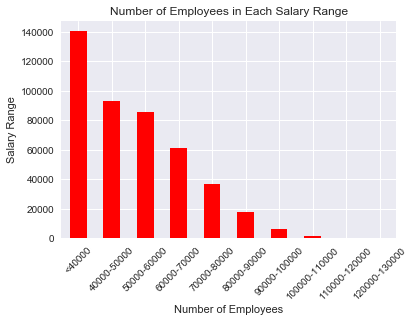

In [56]:
employee_count_by_salary.plot(kind='bar', color='red')
plt.title("Number of Employees in Each Salary Range")
plt.ylabel("Salary Range")
plt.xlabel("Number of Employees")
plt.xticks(rotation=45)
# Show plot
plt.show()
plt.tight_layout()
plt.close()


In [57]:
salary_by_title = merge_df.groupby('title')['salary'].mean()

salary_by_title

title
Assistant Engineer    48493.204786
Engineer              48539.781423
Manager               51531.041667
Senior Engineer       48506.751806
Senior Staff          58503.286614
Staff                 58465.271904
Technique Leader      48580.505772
Name: salary, dtype: float64

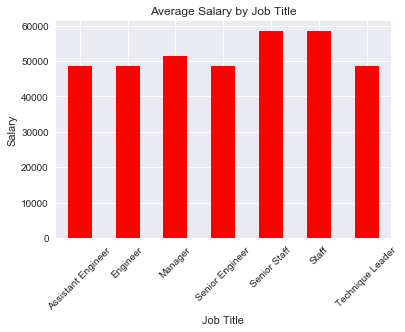

In [58]:
salary_by_title.plot(kind='bar', color='red')
plt.title("Average Salary by Job Title")
plt.ylabel("Salary")
plt.xlabel("Job Title")
plt.xticks(rotation=45)
# Show plot
plt.show()
plt.tight_layout()
plt.close()

In [ ]:
# Most employees earn 40k. As salary increases number of employees steadily decreases
# Staff and Senior Staff are earning more than engineers

# The second trend is unusual. The first trend is not unusual at all - most companies have a large number of employees at low-wage positions



In [52]:
merge_df.loc[merge_df['emp_no'] == 499942]

emp_no  salary salary_from_date salary_to_date             title  \
55487  499942   40000       1998-03-28     1999-03-28  Technique Leader   

      title_from_date title_to_date Salary Range  
55487      1998-03-28    9999-01-01       <40000